# Project from ED SCIENCE 

<h1>SALES DATA ANALYSIS

Questions which will guide you through the analysis:

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?


### Import required libraries

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Import the dataset we are going to work with

In [219]:
df = pd.read_excel('Data/superstore_sales.xlsx')

### Check what our data looks like

##### Check the first five entries

In [221]:
df.head() 

# or the last five entries
#df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


#####  Check the number of columns and rows

In [222]:
# Rows
df.shape[0]

51290

In [223]:
# Columns
df.shape[1]

21

#### Check all columns name

In [224]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

##### Check if there is some missing values

In [226]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

##### Summary statistics

In [227]:
round(df.describe())

# or df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


<h1> ANSWER QUESTIONS

<h2> Q1. What is the overall sales trend?

In [231]:
# Get month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [232]:
# group month_year
df_temp = df.groupby('month_year')
df_temp = df_temp.sum()

In [233]:
# Get sales
df_temp = df_temp['sales'].reset_index() # reset index is needed to get the month_year column (set to be the index)

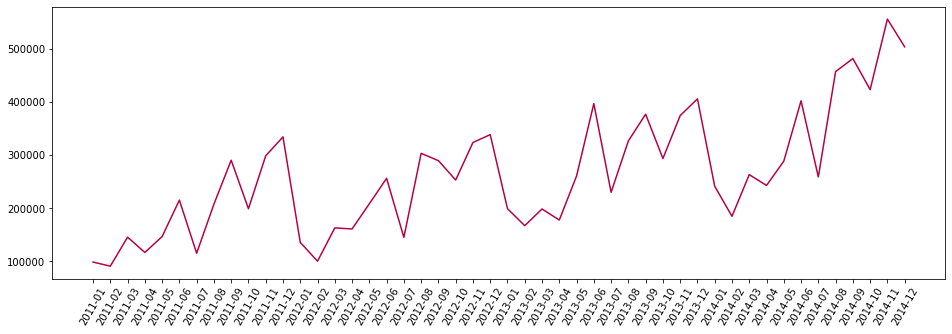

In [242]:
# Plotting
plt.figure(figsize=(16, 5))
plt.plot(df_temp.month_year, df_temp.sales, color='#b80045')
plt.xticks(rotation=60, size=10)
plt.show()

## Q2. Which are the top 10 products by sales?

In [250]:
# Grouping
top10 = df.groupby('product_name')
top10 = top10.sum()

# select sales column
top10 = top10['sales']

# sorting vales
Prod_top10 = pd.DataFrame(top10.sort_values(ascending=False))

# Selecting the top10
Prod_top10[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


## Q3. Which are the most selling products?

In [251]:
# Grouping
best_selling_products = df.groupby('product_name')
best_selling_products = best_selling_products.sum()

# Select quantity columns
best_selling_products = best_selling_products['quantity']

# Sort values
best_selling_top10 = pd.DataFrame(best_selling_products.sort_values(ascending=False))

# Select the top10
best_selling_top10[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


## Q4. Which is the most prefered ship mode?

In [252]:
# Select ship_mode columns
shipMode = df['ship_mode']

# Count values
shipMode = shipMode.value_counts()

# Get the most prefered one
most_prefered_shipMode = shipMode.idxmax()

print('The most preferd ship mode is {}.'.format(most_prefered_shipMode))

The most preferd ship mode is Standard Class.


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

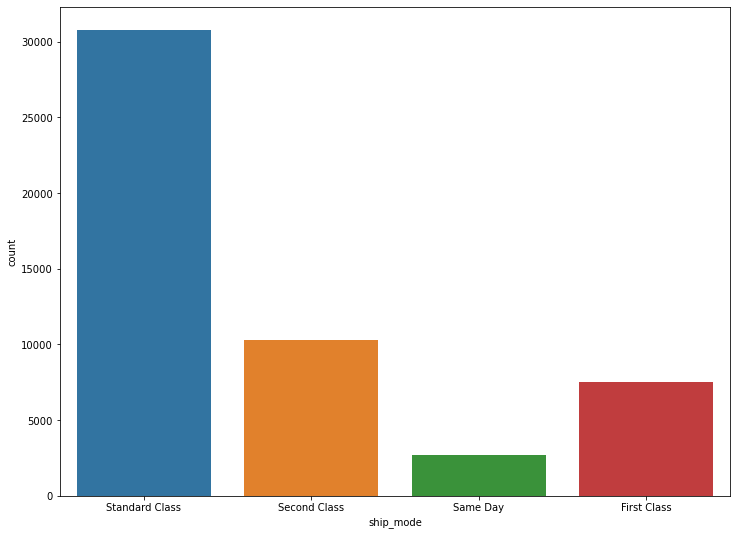

In [253]:
# Or we can check the most prefered ship mode by plotting bars for each ship_mode values


plt.figure(figsize = (12,9))

# seaborn countplot can do the job
sns.countplot(data = df, x='ship_mode')

## Q5. Which are the most profitable category and  sub-vategory?

In [254]:
# Grouping by category and cub-category
cat_subcat = df.groupby(['category','sub_category'])
cat_subcat = cat_subcat.sum()

# select with profit
cat_subcat = pd.DataFrame(cat_subcat['profit'])

# sort values
most_cat_subcat = cat_subcat.sort_values(by=['category','profit'], ascending=False)
most_cat_subcat

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870